In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb

In [34]:
smoke_df = pd.read_csv("/Users/alexxu/Downloads/smoking.csv", index_col=0)

# smoke_df.drop(['height(cm)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)'], axis=1, inplace=True)

X = smoke_df.drop('smoking', axis=1)
y = smoke_df['smoking']
X = pd.get_dummies(X, columns = ['gender', 'oral', 'tartar'])

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

In [35]:
smoke_df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
ID,,,,,,,,,,,,,,,,,,,,,
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0


/Users/alexxu/.local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/alexxu/opt/miniconda3/envs/py39/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:06] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.5, 1.0)

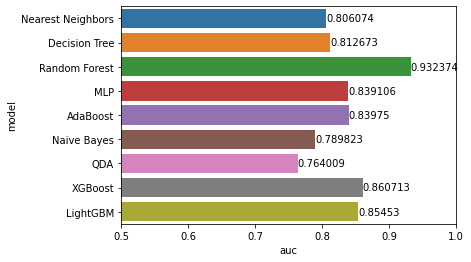

In [54]:

names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "MLP",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost",
    "LightGBM",
]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=1000),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    xgb.XGBClassifier(),
    lgb.LGBMClassifier(),
]

auc_list = []
for i, clf in enumerate(classifiers):
    clf.fit(X_train, y_train)
    auc = metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
    auc_list.append(auc)

res_df = pd.DataFrame({'model': names, 'auc': auc_list})

sns.barplot(x='auc', y='model', data=res_df)
ax = plt.gca()
ax.bar_label(ax.containers[0])
ax.set_xlim([0.5, 1.0])

/Users/alexxu/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


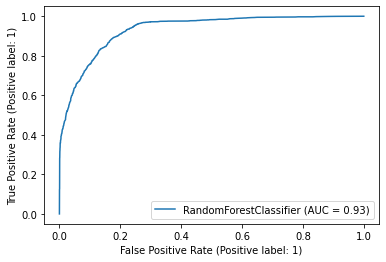

In [37]:
# RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
auc
metrics.plot_roc_curve(model, X_test, y_test)

In [20]:
# KNeighborsClassifier
model = KNeighborsClassifier(100)
model.fit(X_train, y_train)
auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
auc

0.8197106865667516

In [24]:
# DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
auc

0.8126044771737366

In [31]:
# MLPClassifier
model = MLPClassifier(alpha=1, max_iter=1000)
model.fit(X_train, y_train)
auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
auc

0.8372067575549285

In [26]:
# AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)
auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
auc

0.8380260644599724

In [28]:
# GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
auc

0.7952235650903414

In [30]:
# QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
auc

/Users/alexxu/.local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.5951853630061518

In [32]:
# xgboost
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
auc

/Users/alexxu/opt/miniconda3/envs/py39/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/alexxu/opt/miniconda3/envs/py39/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:42:14] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8598424250379085

In [44]:
# lightgbm
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
auc

0.8545295029929572